<a href="https://colab.research.google.com/github/ankesh86/PySparkNotebooks/blob/main/EDAStepsOfHousingDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspark==3.4.0

## **Setting varriables**

In [2]:
filename = "sample_data/bank-full.csv"
target_variable_name = "y"

## **Creating session + Load file**

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
df = spark.read.csv(filename, header=True, inferSchema=True, sep=';')
df.show()

+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|age|         job| marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
| 58|  management| married| tertiary|     no|   2143|    yes|  no|unknown|  5|  may|     261|       1|   -1|       0| unknown| no|
| 44|  technician|  single|secondary|     no|     29|    yes|  no|unknown|  5|  may|     151|       1|   -1|       0| unknown| no|
| 33|entrepreneur| married|secondary|     no|      2|    yes| yes|unknown|  5|  may|      76|       1|   -1|       0| unknown| no|
| 47| blue-collar| married|  unknown|     no|   1506|    yes|  no|unknown|  5|  may|      92|       1|   -1|       0| unknown| no|
| 33|     unknown|  single|  unknown|     no|      1|     no|  no|unknown|  5|  may

In [4]:
df.count()

45211

In [5]:
df.describe().toPandas()

,summary,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
1,mean,40.93621021432837,None,None,None,None,1362.2720576850766,None,None,None,15.80641879188693,None,258.1630797814691,2.763840658246887,40.19782796222158,0.5803233726305546,None,None
2,stddev,10.618762040975408,None,None,None,None,3044.7658291685243,None,None,None,8.322476153044596,None,257.52781226517095,3.098020883279184,100.12874599059813,2.3034410449312204,None,None
3,min,18,admin.,divorced,primary,no,-8019,no,no,cellular,1,apr,0,1,-1,0,failure,no
4,max,95,unknown,single,unknown,yes,102127,yes,yes,unknown,31,sep,4918,63,871,275,unknown,yes


In [6]:
df.dtypes
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- y: string (nullable = true)



In [7]:
#single variable count by group
df.groupBy('education').count().show()

+---------+-----+
|education|count|
+---------+-----+
|  unknown| 1857|
| tertiary|13301|
|secondary|23202|
|  primary| 6851|
+---------+-----+



In [8]:
#target count
df.groupBy(target_variable_name).count().show()

+---+-----+
|  y|count|
+---+-----+
| no|39922|
|yes| 5289|
+---+-----+



In [9]:
#multiple column group
df.groupBy(['education', target_variable_name]).count().show()

+---------+---+-----+
|education|  y|count|
+---------+---+-----+
|  unknown| no| 1605|
| tertiary| no|11305|
|secondary| no|20752|
|  unknown|yes|  252|
|  primary| no| 6260|
|  primary|yes|  591|
|secondary|yes| 2450|
| tertiary|yes| 1996|
+---------+---+-----+



In [10]:
#single variable count by group
df.groupBy('job').count().show()

+-------------+-----+
|          job|count|
+-------------+-----+
|   management| 9458|
|      retired| 2264|
|      unknown|  288|
|self-employed| 1579|
|      student|  938|
|  blue-collar| 9732|
| entrepreneur| 1487|
|       admin.| 5171|
|   technician| 7597|
|     services| 4154|
|    housemaid| 1240|
|   unemployed| 1303|
+-------------+-----+



In [11]:
df.groupBy(['job',target_variable_name]).count().show()

+-------------+---+-----+
|          job|  y|count|
+-------------+---+-----+
|       admin.| no| 4540|
|      retired|yes|  516|
|   management| no| 8157|
|  blue-collar| no| 9024|
|      student| no|  669|
|      unknown| no|  254|
|   technician| no| 6757|
|       admin.|yes|  631|
|   management|yes| 1301|
|  blue-collar|yes|  708|
|      unknown|yes|   34|
|   unemployed| no| 1101|
|self-employed|yes|  187|
|   unemployed|yes|  202|
|    housemaid|yes|  109|
|   technician|yes|  840|
|     services|yes|  369|
|self-employed| no| 1392|
|    housemaid| no| 1131|
| entrepreneur|yes|  123|
+-------------+---+-----+
only showing top 20 rows



In [12]:
#column aggregations
from pyspark.sql.functions import *
df.groupBy(target_variable_name).agg({'balance':'avg', 'age':'avg'}).show()

+---+------------------+------------------+
|  y|      avg(balance)|          avg(age)|
+---+------------------+------------------+
| no|1303.7149691899203| 40.83898602274435|
|yes|1804.2679145396105|41.670069956513515|
+---+------------------+------------------+



## **Cardianility check**

In [13]:
from pyspark.sql.functions import approxCountDistinct, countDistinct

"""
Note: approxCountDistinct and countDistinct can be used interchangeably. Only difference is the computation time.

"approxCountDistinct" is useful for large datasets
"countDistinct" for small and medium datasets.

"""

def cardinality_calculation(df, cut_off=1):
    cardinality = df.select(*[approxCountDistinct(c).alias(c) for c in df.columns])

    ## convert to pandas for efficient calculations
    final_cardinality_df = cardinality.toPandas().transpose()
    final_cardinality_df.reset_index(inplace=True)
    final_cardinality_df.rename(columns={0:'Cardinality'}, inplace=True)

    #select variables with cardinality of 1
    vars_selected = final_cardinality_df['index'][final_cardinality_df['Cardinality'] <= cut_off]

    return final_cardinality_df, vars_selected

cardinality_df, cardinality_vars_selected = cardinality_calculation(df)

/usr/local/lib/python3.10/dist-packages/pyspark/sql/functions.py:2610: FutureWarning: Deprecated in 2.1, use approx_count_distinct instead.
  warnings.warn("Deprecated in 2.1, use approx_count_distinct instead.", FutureWarning)


In [14]:
cardinality_df

,index,Cardinality
0,age,76
1,job,11
2,marital,3
3,education,4
4,default,2
5,balance,7375
6,housing,2
7,loan,2
8,contact,3
9,day,32


In [15]:
cardinality_vars_selected

Series([], Name: index, dtype: object)

## **Missing Values check**

In [16]:
#missing values check
from pyspark.sql.functions import count, when, isnan, col

# miss_percentage is set to 80% as discussed in the book
def missing_calculation(df, miss_percentage=0.80):

    #checks for both NaN and null values
    missing = df.select(*[count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns])
    length_df = df.count()
    ## convert to pandas for efficient calculations
    final_missing_df = missing.toPandas().transpose()
    final_missing_df.reset_index(inplace=True)
    final_missing_df.rename(columns={0:'missing_count'}, inplace=True)
    final_missing_df['missing_percentage'] = final_missing_df['missing_count']/length_df

    #select variables with cardinality of 1
    vars_selected = final_missing_df['index'][final_missing_df['missing_percentage'] >= miss_percentage]

    return final_missing_df, vars_selected

In [17]:
missing_df, missing_vars_selected = missing_calculation(df)

In [18]:
missing_df

,index,missing_count,missing_percentage
0,age,0,0.0
1,job,0,0.0
2,marital,0,0.0
3,education,0,0.0
4,default,0,0.0
5,balance,0,0.0
6,housing,0,0.0
7,loan,0,0.0
8,contact,0,0.0
9,day,0,0.0


In [19]:
missing_vars_selected

Series([], Name: index, dtype: object)

## **Dealing with String columns**

*   Individually casting each column to desired data type
* OneHotEncoder (Spark >=3.0)
* StringIndexer - assigns number to each level with 0 as most frequent
* Weighted Indes or Weight of Evidence


Performing String indexer method

In [20]:
# step 1 : Identify variable types
def variable_type(df):
  vars_list = df.dtypes
  char_vars = []
  num_vars = []

  for i in vars_list:
    if i[1] in ('string'):
      char_vars.append(i[0])
    else:
      num_vars.append(i[0])

  return char_vars, num_vars

char_vars, num_vars = variable_type(df)


In [21]:
# step 2: applying string Indexer to character columns
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline

# convert each category column to index
def category_to_index(df, char_vars):

  char_df = df.select(char_vars)
  indexers = [StringIndexer(inputCol=c, outputCol=c+"_index", handleInvalid="keep") for c in char_df.columns]

  pipeline = Pipeline(stages=indexers)
  char_labels = pipeline.fit(char_df)
  df = char_labels.transform(df)

  return df, char_labels

# apply category to index function on our dataframe
df, char_labels = category_to_index(df, char_vars)


In [22]:
df.dtypes

[('age', 'int'),
 ('job', 'string'),
 ('marital', 'string'),
 ('education', 'string'),
 ('default', 'string'),
 ('balance', 'int'),
 ('housing', 'string'),
 ('loan', 'string'),
 ('contact', 'string'),
 ('day', 'int'),
 ('month', 'string'),
 ('duration', 'int'),
 ('campaign', 'int'),
 ('pdays', 'int'),
 ('previous', 'int'),
 ('poutcome', 'string'),
 ('y', 'string'),
 ('job_index', 'double'),
 ('marital_index', 'double'),
 ('education_index', 'double'),
 ('default_index', 'double'),
 ('housing_index', 'double'),
 ('loan_index', 'double'),
 ('contact_index', 'double'),
 ('month_index', 'double'),
 ('poutcome_index', 'double'),
 ('y_index', 'double')]

In [23]:
df = df.select([c for c in df.columns if c not in char_vars])

In [24]:
df.show()

+---+-------+---+--------+--------+-----+--------+---------+-------------+---------------+-------------+-------------+----------+-------------+-----------+--------------+-------+
|age|balance|day|duration|campaign|pdays|previous|job_index|marital_index|education_index|default_index|housing_index|loan_index|contact_index|month_index|poutcome_index|y_index|
+---+-------+---+--------+--------+-----+--------+---------+-------------+---------------+-------------+-------------+----------+-------------+-----------+--------------+-------+
| 58|   2143|  5|     261|       1|   -1|       0|      1.0|          0.0|            1.0|          0.0|          0.0|       0.0|          1.0|        0.0|           0.0|    0.0|
| 44|     29|  5|     151|       1|   -1|       0|      2.0|          1.0|            0.0|          0.0|          0.0|       0.0|          1.0|        0.0|           0.0|    0.0|
| 33|      2|  5|      76|       1|   -1|       0|      7.0|          0.0|            0.0|          0.0| 

In [25]:
def rename_columns(df, char_vars):
    mapping = dict(zip([i + '_index' for i in char_vars], char_vars))
    df = df.select([col(c).alias(mapping.get(c, c)) for c in df.columns])
    return df

In [26]:
df = rename_columns(df, char_vars)

In [27]:
df.dtypes

[('age', 'int'),
 ('balance', 'int'),
 ('day', 'int'),
 ('duration', 'int'),
 ('campaign', 'int'),
 ('pdays', 'int'),
 ('previous', 'int'),
 ('job', 'double'),
 ('marital', 'double'),
 ('education', 'double'),
 ('default', 'double'),
 ('housing', 'double'),
 ('loan', 'double'),
 ('contact', 'double'),
 ('month', 'double'),
 ('poutcome', 'double'),
 ('y', 'double')]

In [28]:
df.groupBy('y').count().show()

+---+-----+
|  y|count|
+---+-----+
|0.0|39922|
|1.0| 5289|
+---+-----+



In [29]:
#step 3 : assembling features
#assemble feature in one vector

from pyspark.ml.feature import VectorAssembler

#assemble individual columns to one column - 'features'
def assemble_vectors(df, features_list, target_variable_name):
    stages = []
    #assemble vectors
    assembler = VectorAssembler(inputCols=features_list, outputCol='features')
    stages = [assembler]
    #select all the columns + target + newly created 'features' column
    selectedCols = [target_variable_name, 'features'] + features_list
    #use pipeline to process sequentially
    pipeline = Pipeline(stages=stages)
    #assembler model
    assembleModel = pipeline.fit(df)
    #apply assembler model on data
    df = assembleModel.transform(df).select(selectedCols)

    return df

#exclude target variable and select all other feature vectors
features_list = df.columns
features_list.remove(target_variable_name)

#apply the function on our dataframe
df = assemble_vectors(df, features_list, target_variable_name)



In [30]:
df.show()

+---+--------------------+---+-------+---+--------+--------+-----+--------+----+-------+---------+-------+-------+----+-------+-----+--------+
|  y|            features|age|balance|day|duration|campaign|pdays|previous| job|marital|education|default|housing|loan|contact|month|poutcome|
+---+--------------------+---+-------+---+--------+--------+-----+--------+----+-------+---------+-------+-------+----+-------+-----+--------+
|0.0|(16,[0,1,2,3,4,5,...| 58|   2143|  5|     261|       1|   -1|       0| 1.0|    0.0|      1.0|    0.0|    0.0| 0.0|    1.0|  0.0|     0.0|
|0.0|(16,[0,1,2,3,4,5,...| 44|     29|  5|     151|       1|   -1|       0| 2.0|    1.0|      0.0|    0.0|    0.0| 0.0|    1.0|  0.0|     0.0|
|0.0|(16,[0,1,2,3,4,5,...| 33|      2|  5|      76|       1|   -1|       0| 7.0|    0.0|      0.0|    0.0|    0.0| 1.0|    1.0|  0.0|     0.0|
|0.0|(16,[0,1,2,3,4,5,...| 47|   1506|  5|      92|       1|   -1|       0| 0.0|    0.0|      3.0|    0.0|    0.0| 0.0|    1.0|  0.0|     0.0|

In [31]:
df.schema["features"].metadata["ml_attr"]["attrs"]

{'numeric': [{'idx': 0, 'name': 'age'},
  {'idx': 1, 'name': 'balance'},
  {'idx': 2, 'name': 'day'},
  {'idx': 3, 'name': 'duration'},
  {'idx': 4, 'name': 'campaign'},
  {'idx': 5, 'name': 'pdays'},
  {'idx': 6, 'name': 'previous'}],
 'nominal': [{'vals': ['blue-collar',
    'management',
    'technician',
    'admin.',
    'services',
    'retired',
    'self-employed',
    'entrepreneur',
    'unemployed',
    'housemaid',
    'student',
    'unknown',
    '__unknown'],
   'idx': 7,
   'name': 'job'},
  {'vals': ['married', 'single', 'divorced', '__unknown'],
   'idx': 8,
   'name': 'marital'},
  {'vals': ['secondary', 'tertiary', 'primary', 'unknown', '__unknown'],
   'idx': 9,
   'name': 'education'},
  {'vals': ['no', 'yes', '__unknown'], 'idx': 10, 'name': 'default'},
  {'vals': ['yes', 'no', '__unknown'], 'idx': 11, 'name': 'housing'},
  {'vals': ['no', 'yes', '__unknown'], 'idx': 12, 'name': 'loan'},
  {'vals': ['cellular', 'unknown', 'telephone', '__unknown'],
   'idx': 13,


In [32]:
import pandas as pd
for k, v in df.schema["features"].metadata["ml_attr"]["attrs"].items():
    features_df = pd.DataFrame(v)

In [33]:
features_df

,vals,idx,name
0,"[blue-collar, management, technician, admin., ...",7,job
1,"[married, single, divorced, __unknown]",8,marital
2,"[secondary, tertiary, primary, unknown, __unkn...",9,education
3,"[no, yes, __unknown]",10,default
4,"[yes, no, __unknown]",11,housing
5,"[no, yes, __unknown]",12,loan
6,"[cellular, unknown, telephone, __unknown]",13,contact
7,"[may, jul, aug, jun, nov, apr, feb, jan, oct, ...",14,month
8,"[unknown, failure, other, success, __unknown]",15,poutcome


# **Inbuilt variable selection process – Without Target**

# PCA

In [34]:
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors

no_of_comp = 3
pca = PCA(k = no_of_comp, inputCol="features", outputCol="pcaFeatures")
model = pca.fit(df)
result = model.transform(df).select("pcaFeatures")
result.show(truncate=False)



+------------------------------------------------------------+
|pcaFeatures                                                 |
+------------------------------------------------------------+
|[-2143.4953647735815,-257.0420740676505,1.244971275304795]  |
|[-29.2922617516463,-150.92888640669167,1.0493026899279936]  |
|[-2.150889773941893,-75.98191250436612,1.0760651955381264]  |
|[-1506.182330590812,-89.215471546727,1.2683999536976094]    |
|[-1.375090834944834,-197.98356175494823,0.9892427009816441] |
|[-231.26679712386624,-138.56034919503713,1.057696089139628] |
|[-447.4072782675641,-216.16541383839746,1.0066666548031191] |
|[-2.7123264447442366,-379.9785828164355,0.8751504698368221] |
|[-121.11144848214052,-49.75636025970779,1.1725853591924071] |
|[-593.1146061641075,-53.893642618320335,1.181702273226208]  |
|[-270.4212341323417,-221.48699661827916,1.017082407320575]  |
|[-390.2608167665409,-136.27016909339133,1.0625336862699812] |
|[-6.967616100129205,-516.9674558248697,0.8003545768071

In [35]:
model.pc.toArray()

array([[-3.41021399e-04,  2.79524640e-04,  2.58353293e-03],
       [-9.99998245e-01,  1.83654726e-03,  1.13892524e-04],
       [-1.22934480e-05,  9.79995613e-04,  7.79347982e-03],
       [-1.83671689e-03, -9.99996986e-01, -7.36955549e-04],
       [ 1.48468991e-05,  1.01391994e-03,  2.75121381e-03],
       [-1.13085547e-04,  7.49207153e-04, -9.99889046e-01],
       [-1.26153895e-05, -6.36100089e-06, -1.04654388e-02],
       [-1.78789640e-05, -4.11817349e-05,  5.51411389e-04],
       [ 6.41085932e-06, -5.23364803e-05, -1.45349520e-04],
       [-1.11185424e-05,  1.30366514e-05,  2.01500982e-04],
       [ 2.91665702e-06,  4.42643869e-06,  3.95562163e-05],
       [-1.12221341e-05,  1.26153926e-05,  6.17569266e-04],
       [ 1.01623400e-05,  1.50687571e-05,  8.23933054e-05],
       [-5.68377754e-07,  6.95393403e-05,  1.03951369e-03],
       [-7.60886236e-05, -1.16754927e-04, -3.24662847e-03],
       [-8.55162111e-06, -6.01853226e-05, -4.94522998e-03]])

In [36]:
model.explainedVariance

DenseVector([0.9918, 0.0071, 0.0011])

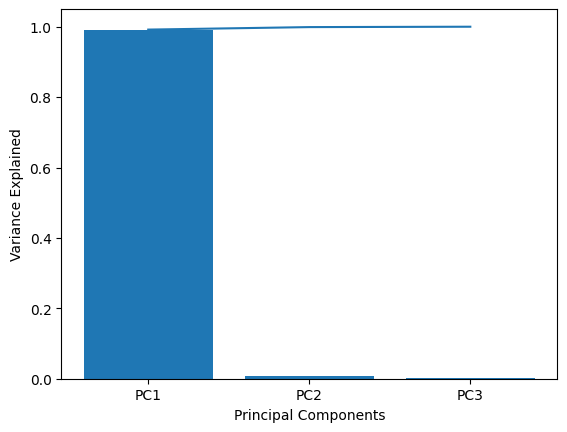

In [37]:
import matplotlib.pyplot as plt
import numpy as np
x = []
for i in range(0, len(model.explainedVariance)):
    x.append('PC' + str(i + 1))
y = np.array(model.explainedVariance)
z = np.cumsum(model.explainedVariance)
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.bar(x, y)
plt.plot(x, z)

As data PC1 explains 99% of data, bca we didn't sccale our dataframe.
## Applying scaling (StandardScaler)

In [38]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler

#assemble and scale individual columns to one column - 'features2'
def scaled_assemble_vectors(df, features_list, target_variable_name):
    stages = []
    #assemble vectors
    assembler = VectorAssembler(inputCols=features_list, outputCol='assembled_features')
    scaler = StandardScaler(inputCol=assembler.getOutputCol(), outputCol='features2')
    stages = [assembler, scaler]
    #select all the columns + target + newly created 'features' column
    selectedCols = [target_variable_name, 'features2'] + features_list
    #use pipeline to process sequentially
    pipeline = Pipeline(stages=stages)
    #assembler model
    scaleAssembleModel = pipeline.fit(df)
    #apply assembler model on data
    df = scaleAssembleModel.transform(df).select(selectedCols)
    return df

features_list = df.columns
features_list.remove(target_variable_name)
df = scaled_assemble_vectors(df, features_list, target_variable_name)


from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors

no_of_comp = 3
pca = PCA(k = no_of_comp, inputCol="features2", outputCol="pcaFeatures")
model = pca.fit(df)
result = model.transform(df).select("pcaFeatures")
result.show(truncate=False)



+------------------------------------------------------------+
|pcaFeatures                                                 |
+------------------------------------------------------------+
|[-0.6567808835228053,4.312194871155298,-4.393764846980897]  |
|[-0.5905533920179782,2.7430023739115263,-2.0129736282025603]|
|[-0.7923309293106011,2.42851782220271,-1.4128758397245442]  |
|[-0.7779852947451467,4.2983026320660285,-5.322505502928544] |
|[-0.5280039534401372,6.559141503669074,-1.4081500208397857] |
|[-0.7028277580737633,2.7093407342344875,-3.226355647066133] |
|[-0.810487232779213,1.4290210013445708,-1.6199354413340639] |
|[-0.9758735335487276,2.8620448590159584,0.4335559756415577] |
|[-0.7126916038562823,5.17563771639752,-4.531453571469942]   |
|[-0.593913202612401,2.7467852504302575,-2.0709944257197637] |
|[-0.4836720278657366,2.5845022963066207,-0.8133472106594234]|
|[-0.5574665926506133,2.0798200304073173,-1.1695266299980627]|
|[-0.6052039081600498,3.494381285319365,-3.060655824796

In [39]:
model.explainedVariance

DenseVector([0.1434, 0.0987, 0.0787])

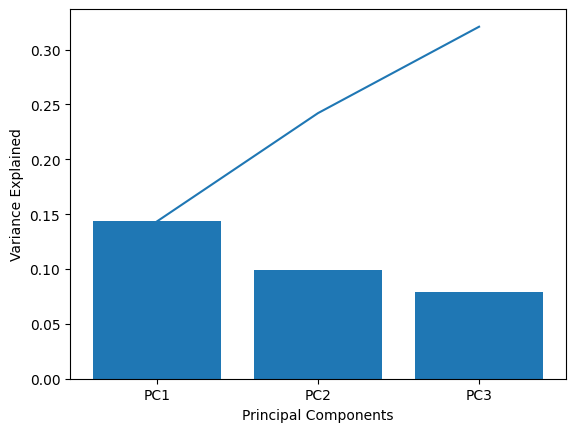

In [40]:
import matplotlib.pyplot as plt
import numpy as np
x = []
for i in range(0, len(model.explainedVariance)):
    x.append('PC' + str(i + 1))
y = np.array(model.explainedVariance)
z = np.cumsum(model.explainedVariance)
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.bar(x, y)
plt.plot(x, z)